In [ ]:
#Sentiment Analysis on Flipkart reviews using Python

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
from google.colab import files
 
 
uploaded = files.upload()

Saving flipkartData.csv to flipkartData.csv


In [6]:
import io


In [8]:
data=pd.read_csv(io.BytesIO(uploaded['flipkartData.csv']))
data.head()

,review,rating
0,1-more flexible2-bass is very high3-sound clar...,5
1,Super sound and good looking I like that prize,5
2,Very much satisfied with the device at this pr...,5
3,"Nice headphone, bass was very good and sound i...",5
4,Sound quality super battery backup super quali...,5


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9374 non-null   object
 1   rating  9374 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 146.6+ KB


In [10]:
print(data.isnull().sum())

review    0
rating    0
dtype: int64


In [11]:
import nltk
import re
nltk.download('stopwords')
stemmer= nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www\.\S+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for word in text.split(' ') if word not in stopwords]
  text=" ".join(text)
  text= [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text

In [13]:
data['review']= data['review'].apply(clean)
data.head()

,review,rating
0,clariti good back hour thing fastest ch...,5
1,super sound good look like prize,5
2,much satisfi devic price point awesom brand de...,5
3,nice headphon bass good sound clear purchas ca...,5
4,sound qualiti super batteri backup super quali...,5


In [14]:
'''The rating column of the data contains the ratings given by every reviewer. So, we will have a look
at how most of the people rate the products they buy from flipkart'''

ratings= data['rating'].value_counts()
numbers=ratings.index
quantity=ratings.values

import plotly.express as px

figure= px.pie(data,
               values=quantity,
               names=numbers, hole=0.5)

figure.show()

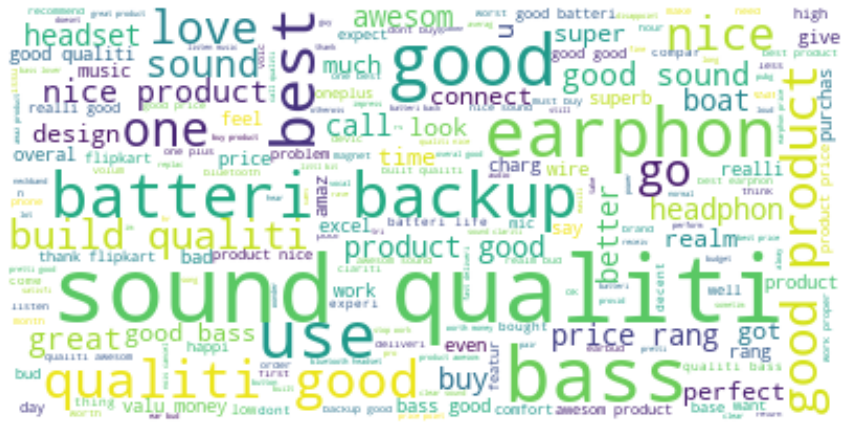

In [15]:
# Let's have a look at the kind of reviews people leave

text=" ".join(i for i in data.review)
stopwords=set(STOPWORDS)
wordcloud= WordCloud(stopwords=stopwords,
                     background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
# Analyse the sentiments of Flipkart review by adding three columns in the dataset
# Positve, Negative and Neutral

nltk.download('vader_lexicon')
sentiment= SentimentIntensityAnalyzer()
data['Positive']=[sentiment.polarity_scores(i)["pos"] for i in data['review']]

data['Negative']=[sentiment.polarity_scores(i)["neg"] for i in data['review']]

data['Neutral']=[sentiment.polarity_scores(i)["neu"] for i in data['review']]

data=data[['review', 'Positive','Negative','Neutral']]

data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,review,Positive,Negative,Neutral
0,clariti good back hour thing fastest ch...,0.287,0.063,0.650
1,super sound good look like prize,0.863,0.000,0.137
2,much satisfi devic price point awesom brand de...,0.223,0.071,0.707
3,nice headphon bass good sound clear purchas ca...,0.394,0.057,0.548
4,sound qualiti super batteri backup super quali...,0.634,0.000,0.366


In [17]:
# Next we can see how most of the reviewers think about the products and services of Flipkart

x=sum(data['Positive'])
y=sum(data['Negative'])
z=sum(data['Neutral'])

def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print("Positive")
  elif (b>a) and (b>c):
    print("Negative")
  else:
    print("Neutral")

sentiment_score(x,y,z)


Neutral


In [18]:
# Now we can see total of positive, negative and neutral sentiment scores
# to find a conclusion about flipkart reviews

print("Positive: ",x)

print("Negative: ",y)

print("Neutral: ",z)

Positive:  3778.6910000000776
Negative:  517.9149999999994
Neutral:  5075.403999999948
